<a href="https://colab.research.google.com/github/ducnguyen1704/pandas2/blob/master/Pandas2_GPDList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Bài tập] Phân tích trên bộ dữ liệu GPD List

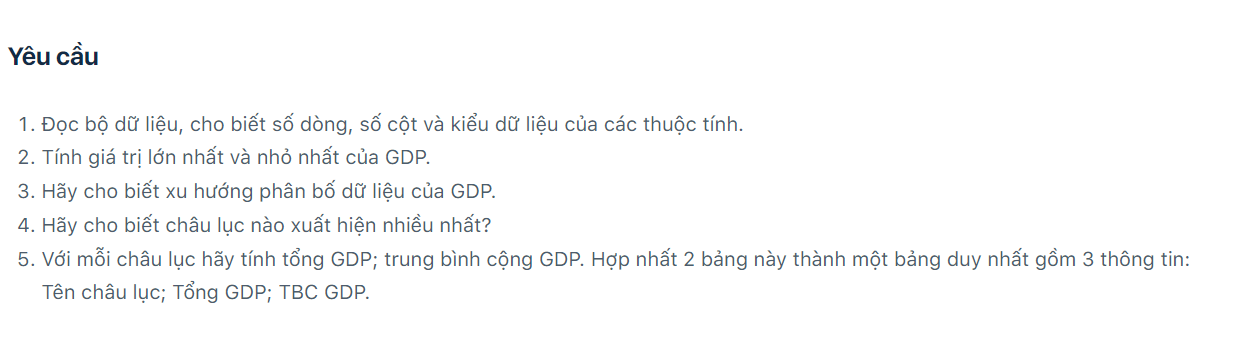

In [1]:
# import thư viện
import numpy as np
import pandas as pd

## 1. Đọc dữ liệu, cho biết số dòng, số cột, kiểu dữ liệu của thuộc tính

In [3]:
data = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31020936/GDPlist.csv', encoding='unicode_escape')
data.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


Bộ data GPD LIST gồm có 125 dòng và 3 cột, kiểu dữ liệu int ở cột GDP, 2 cột country và continent  mang dữ liệu chuỗi

## 2. Tính giá trị lớn nhất và nhỏ nhất của GDP.

In [6]:
print('Giá trị lớn nhất của GDP là: ',data['GDP (millions of US$)'].max())

Giá trị lớn nhất của GDP là:  15094025


In [8]:
print('Giá trị nhỏ nhất của GDP là: ',data['GDP (millions of US$)'].min())

Giá trị nhỏ nhất của GDP là:  10600


## 3. Hãy cho biết xu hướng phân bố dữ liệu của GDP.

In [41]:
import matplotlib.pyplot as plt
continent_GDP = data.loc[:,['Continent','GDP (millions of US$)']]
continent_GDP
# data.hist()

,Continent,GDP (millions of US$)
0,Asia,18181
1,Europe,12847
2,Africa,190709
3,Africa,100948
4,South America,447644
...,...,...
120,Asia,45353
121,South America,315841
122,Asia,122722
123,Africa,33675


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7469ae710>]],
      dtype=object)

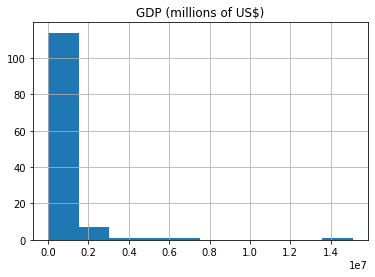

In [45]:
continent_GDP.hist()

## 4. Hãy cho biết châu lục nào xuất hiện nhiều nhất?

In [12]:
data.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [18]:
print('Châu lục xuất hiện nhiều nhất là: ',data['Continent'].mode()) # Châu Âu xuất hiện nhiều nh

Châu lục xuất hiện nhiều nhất là:  0    Europe
dtype: object


## 5. Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.

In [21]:
data_continent = data.loc[:,'Continent']
data_continent

0               Asia
1             Europe
2             Africa
3             Africa
4      South America
           ...      
120             Asia
121    South America
122             Asia
123           Africa
124           Africa
Name: Continent, Length: 125, dtype: object

In [30]:
Tong_GDP = data.pivot_table(values='GDP (millions of US$)', index='Continent', aggfunc={'GDP (millions of US$)':np.sum})
Tong_GDP

,GDP (millions of US$)
Continent,
Africa,1820811
Asia,24425891
Europe,19139380
North America,18238447
Oceania,1662727
South America,4141217


In [33]:
TBC_GDP = data.pivot_table(values='GDP (millions of US$)', index='Continent', aggfunc={'GDP (millions of US$)':np.mean})
TBC_GDP

,GDP (millions of US$)
Continent,
Africa,6.278659e+04
Asia,6.784970e+05
Europe,5.172805e+05
North America,1.658041e+06
Oceania,5.542423e+05
South America,4.601352e+05


In [34]:
data_new = pd.merge(Tong_GDP,TBC_GDP, on='Continent')
data_new

,GDP (millions of US$)_x,GDP (millions of US$)_y
Continent,,
Africa,1820811,6.278659e+04
Asia,24425891,6.784970e+05
Europe,19139380,5.172805e+05
North America,18238447,1.658041e+06
Oceania,1662727,5.542423e+05
South America,4141217,4.601352e+05


In [36]:
data_new.rename(columns={'GDP (millions of US$)_x':'TongGDP', 'GDP (millions of US$)_y':'TBC_GDP'}, inplace=True)
data_new

,TongGDP,TBC_GDP
Continent,,
Africa,1820811,6.278659e+04
Asia,24425891,6.784970e+05
Europe,19139380,5.172805e+05
North America,18238447,1.658041e+06
Oceania,1662727,5.542423e+05
South America,4141217,4.601352e+05
